## Online Food App Analysis

This is a dataset from Kaggle that contains information collected from an online food ordering platform over a period of time. It ecompasses various attributes related to Occupation, Family Size, Feedbacl, etc..

Source: [https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset]

This analysis will be focused on EDA to explore the question of whether various customer attributes is correlated to the online food app feedback and output. The goal is to identify the articular attributes that show a strong correlation to positive feedback and output. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the Data

In [2]:
df = pd.read_csv('onlinefoods.csv')

In [3]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


First, I will select the columns that will be used for the anaylsis. The location attributes (latituve, longitude, and pin code) and the last unnamed column will be dropped. In order to use the location attributes, another dataset will need to be merged into the data to get city & state information. For this project, I will be focusing on data storytelling rather than EDA.

In [4]:
columns_to_drop = ['latitude', 'longitude', 'Pin code', 'Unnamed: 12']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Yes,Positive


# Descriptive Statistics

In [5]:
df.describe()

,Age,Family size
count,388.000000,388.000000
mean,24.628866,3.280928
std,2.975593,1.351025
min,18.000000,1.000000
25%,23.000000,2.000000
50%,24.000000,3.000000
75%,26.000000,4.000000
max,33.000000,6.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0,23.0,24.0,26.0,33.0
Family size,388.0,3.280928,1.351025,1.0,2.0,3.0,4.0,6.0


Using the describe() method only applies to numerical columns which is why we are only seeing the 'Age' and 'Family size' columns. The mean age is 24 with a min age of 18, it seems that customers who use the online food ordering app tends to be younger in their 20s. The mean family size is 2 with a min size of 1, those who are ordering tend to order for themselves or a couple family members.

# Data Cleaning

Next step is to explore the data and check if there are any missing values.

In [7]:
df.dtypes

Age                            int64
Gender                        object
Marital Status                object
Occupation                    object
Monthly Income                object
Educational Qualifications    object
Family size                    int64
Output                        object
Feedback                      object
dtype: object

In [8]:
df.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
Output                         2
Feedback                       2
dtype: int64

In [9]:
df.shape

(388, 9)

The 'Monthly Income' column dtype should be numerical, we will check the unique values of this column.

In [10]:
df['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

'No Income' - we can assume this is $0

'Below Rs. 10000' - we will standardize this amount to $10000

'More than 50000' - we will standardize this amount to $50000

'10001 to 25000' - we will take the mean of this and standardize the amount to $17500.5

'25001 to 50000' - we will take the mean of this and standardize the amount to $37500.50

In [11]:
df['Monthly Income'] = df['Monthly Income'].replace('No Income', 0)
df['Monthly Income'] = df['Monthly Income'].replace('Below Rs.10000', 10000)
df['Monthly Income'] = df['Monthly Income'].replace('More than 50000', 50000)
df['Monthly Income'] = df['Monthly Income'].replace('10001 to 25000', 17500.5)
df['Monthly Income'] = df['Monthly Income'].replace('25001 to 50000', 37500.50)

In [12]:
df['Monthly Income'].unique()

array([    0. , 10000. , 50000. , 17500.5, 37500.5])

Now the 'Monthly Income' column is converted to an actual income value, we will double check if the dtype is correct.

In [13]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                float64
Educational Qualifications     object
Family size                     int64
Output                         object
Feedback                       object
dtype: object

All dtypes look good, we will now check is there are any missing values.

In [14]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
Output                        0
Feedback                      0
dtype: int64

This seems to be a very clean dataset, there are no missing values.

# Dummy Features

Since a majority of our data is categorical, we will use the get_dummies() method to convert the categorical columns into dummy variables.

In [15]:
dummy_df = pd.get_dummies(df)

In [16]:
dummy_df.head()

,Age,Monthly Income,Family size,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,...,Occupation_Student,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive
0,20,0.0,4,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,24,10000.0,3,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
2,22,10000.0,3,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
3,22,0.0,6,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
4,22,10000.0,4,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1


# Heatmap and Correlation

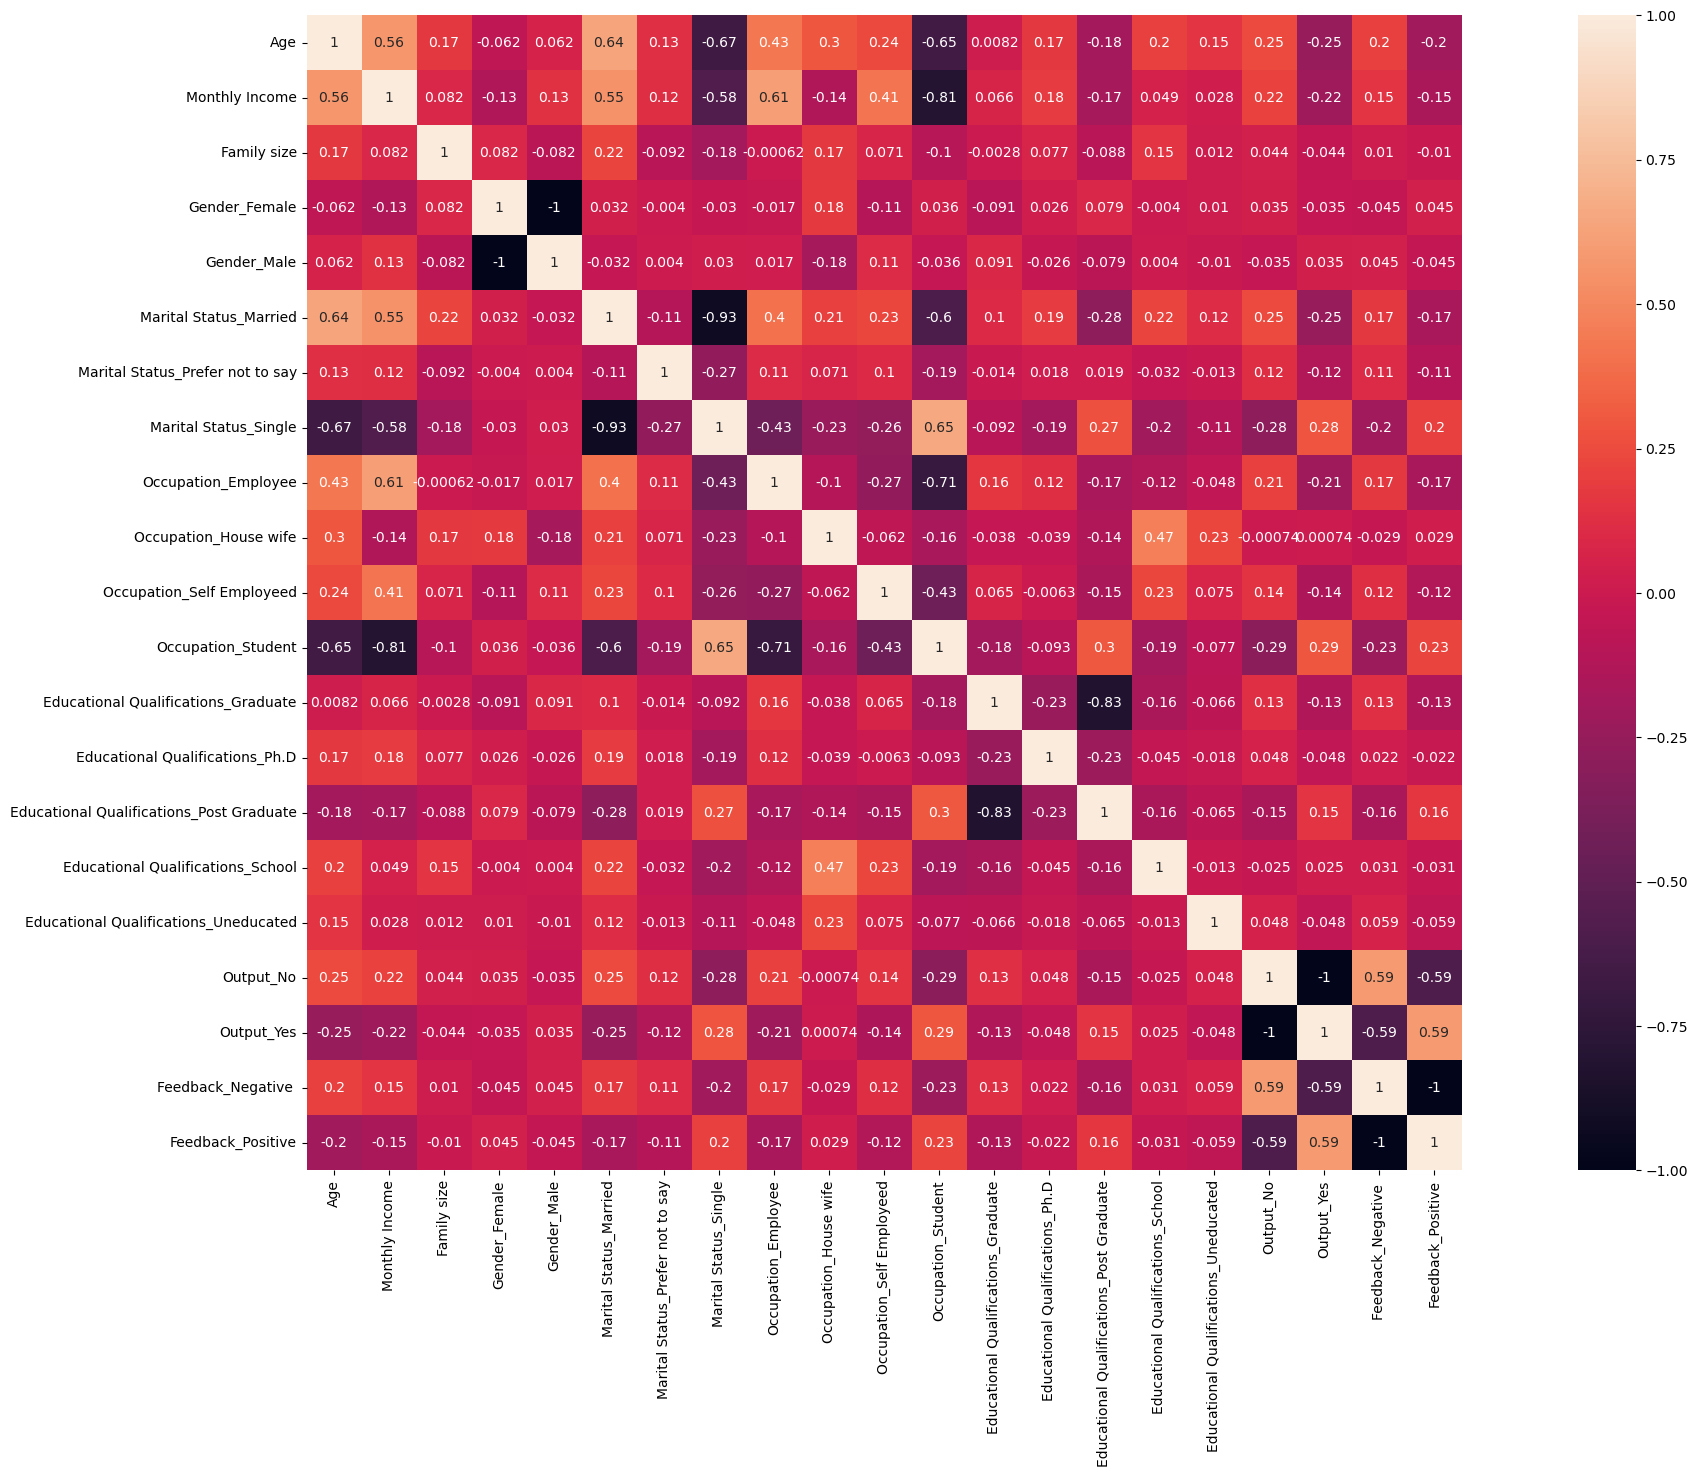

In [18]:
corr =dummy_df.corr(method ='pearson') 
plt.figure(figsize=(30,15))
sns.heatmap(corr, vmax=1, annot=True, square=True)
plt.show()

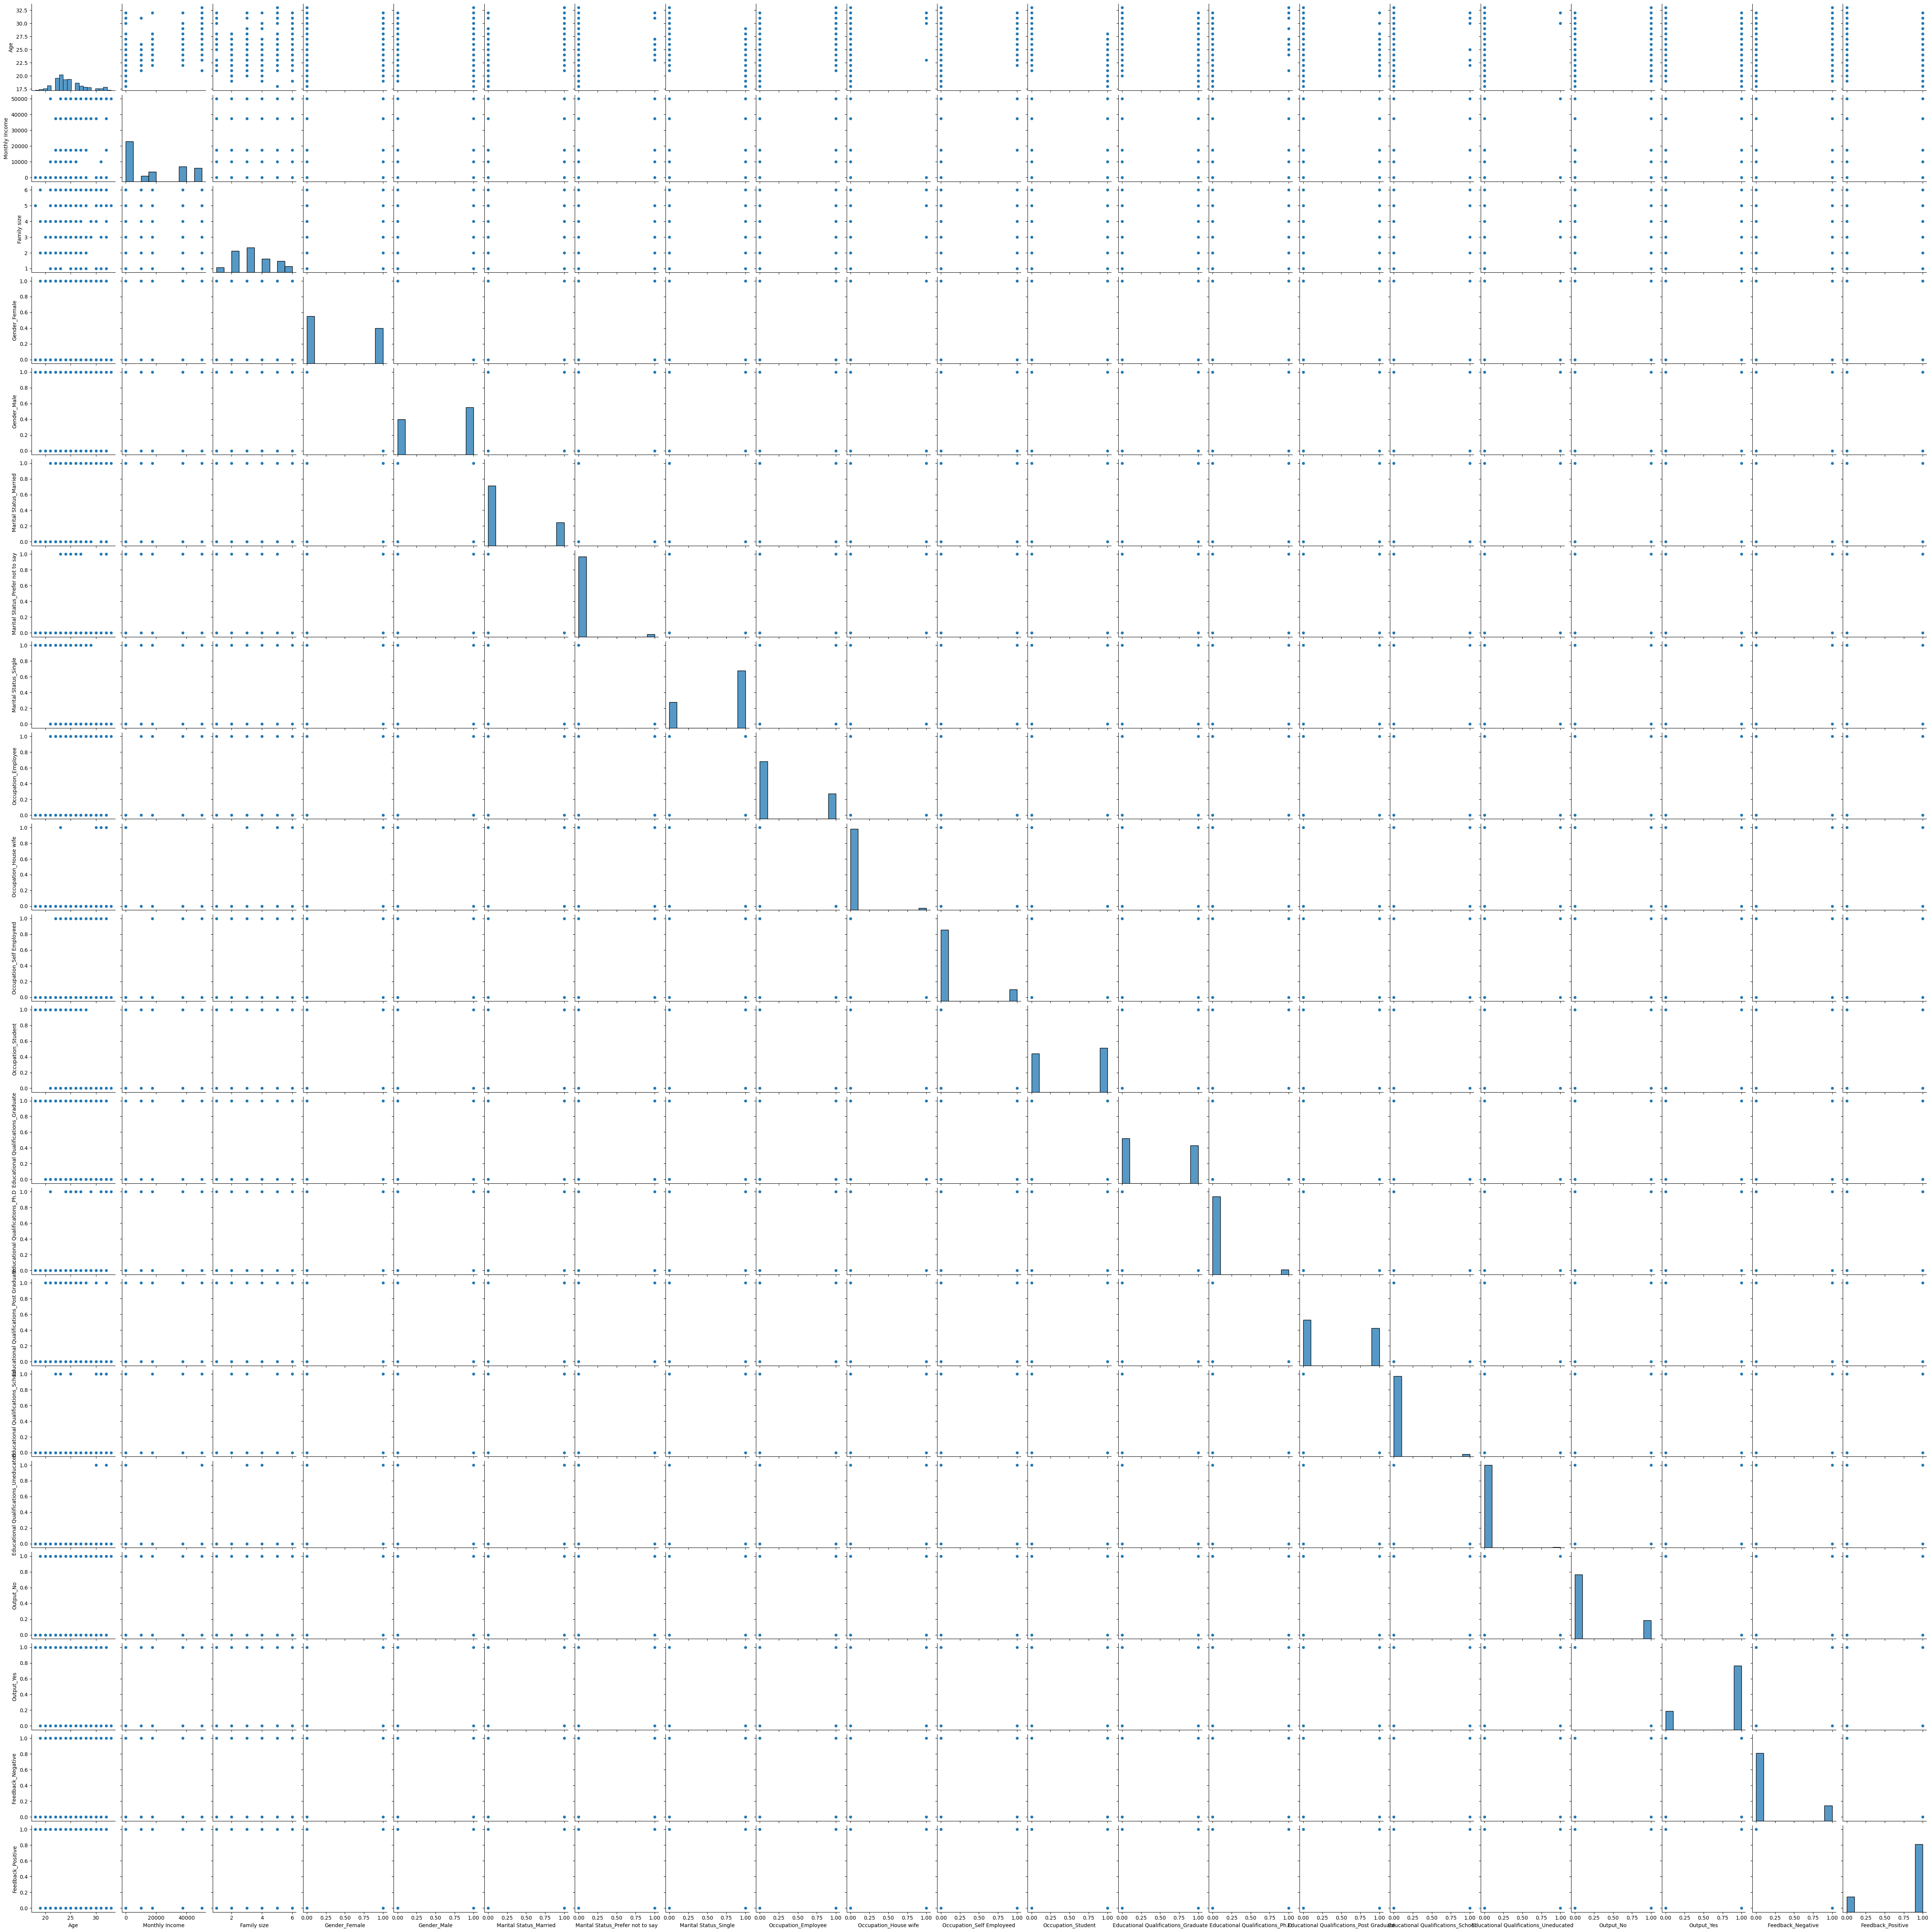

In [19]:
sns.pairplot(dummy_df)
plt.show()

Based on the heatmap and correlation plot, there doesn't seem to be any strong correlations between any of the attributes. We will further explore this dataset using other methods to see if there are any nonlinear relationships.

# Plotting Nonlinear Relationships

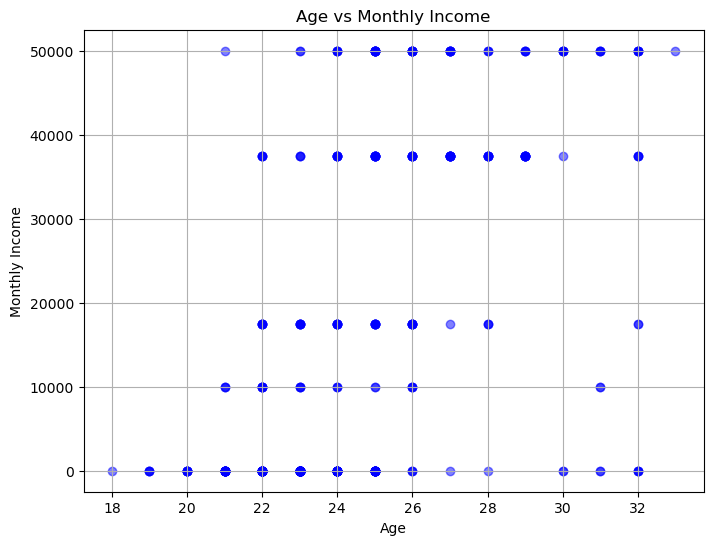

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Monthly Income'], color='blue', alpha=0.5)
plt.title('Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

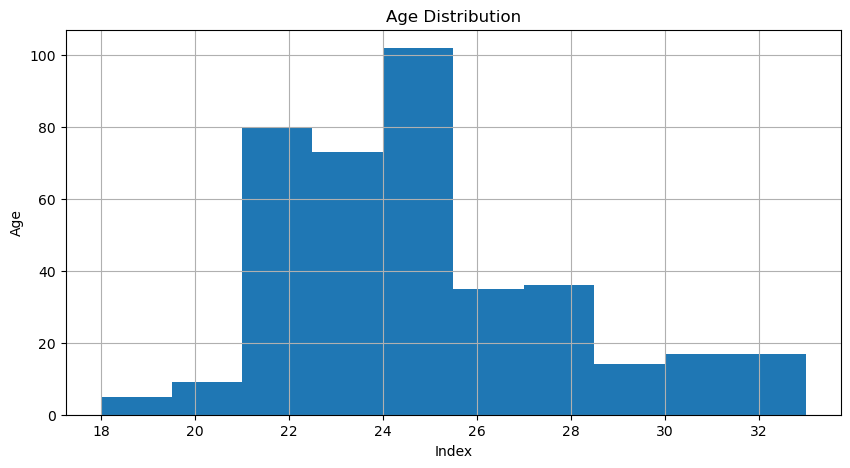

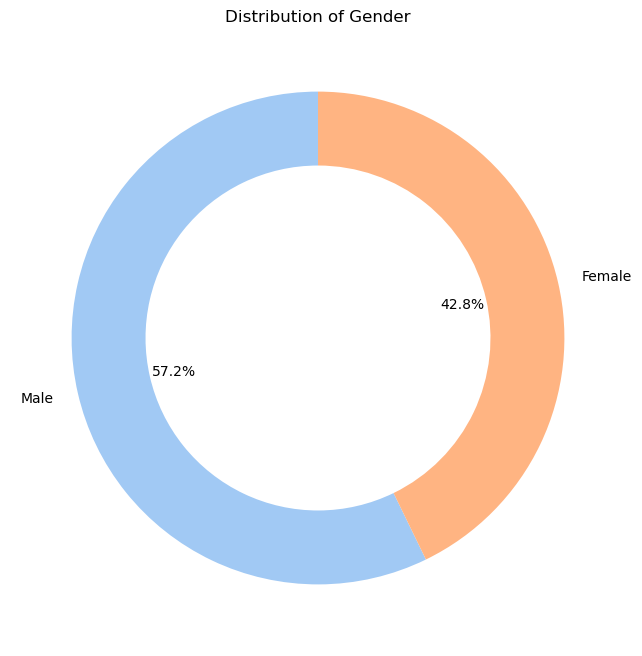

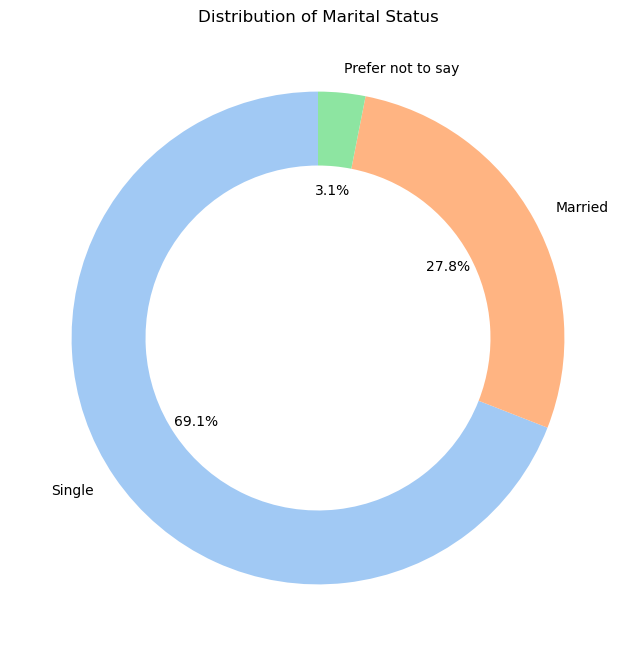

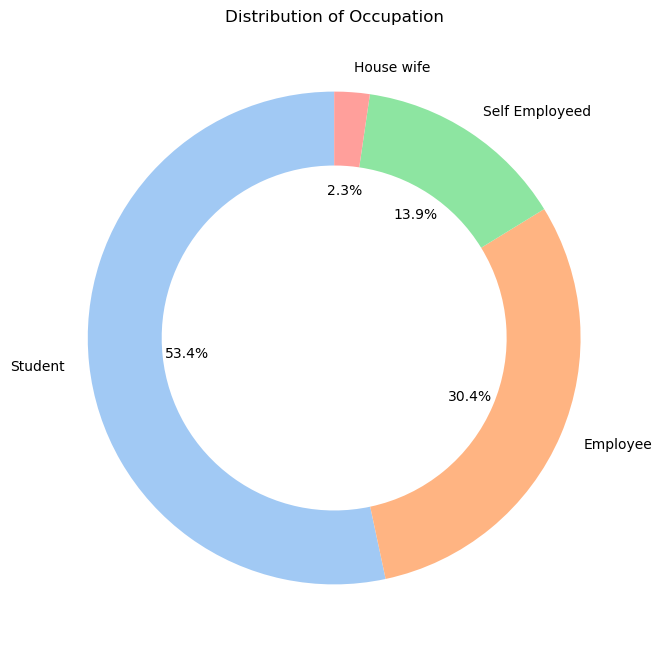

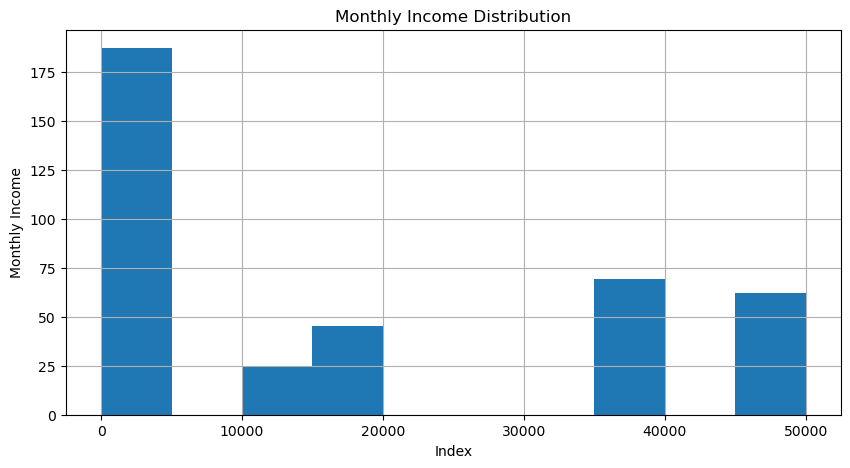

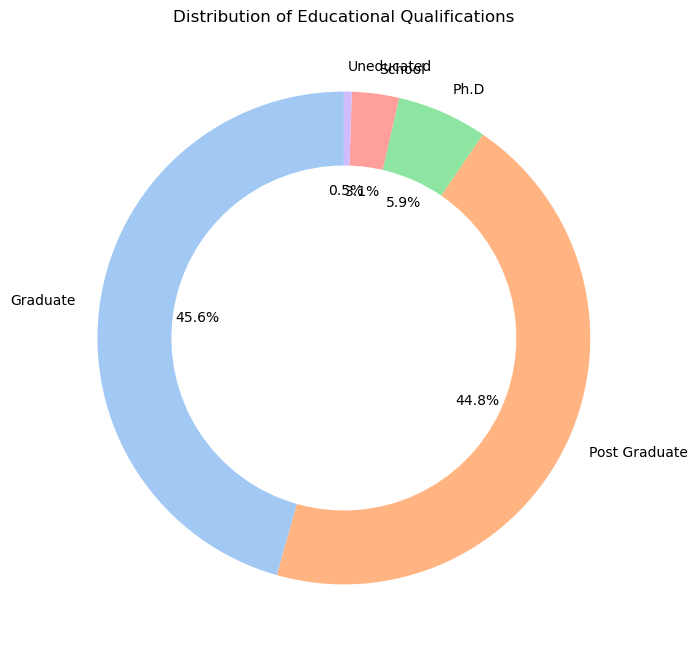

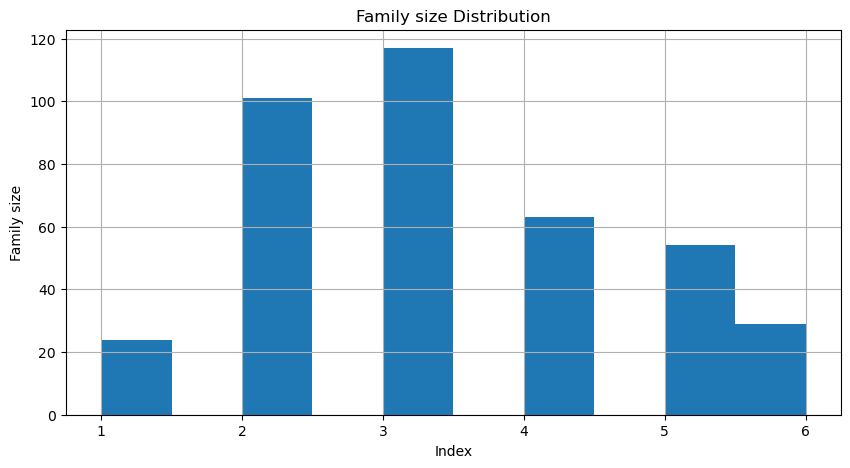

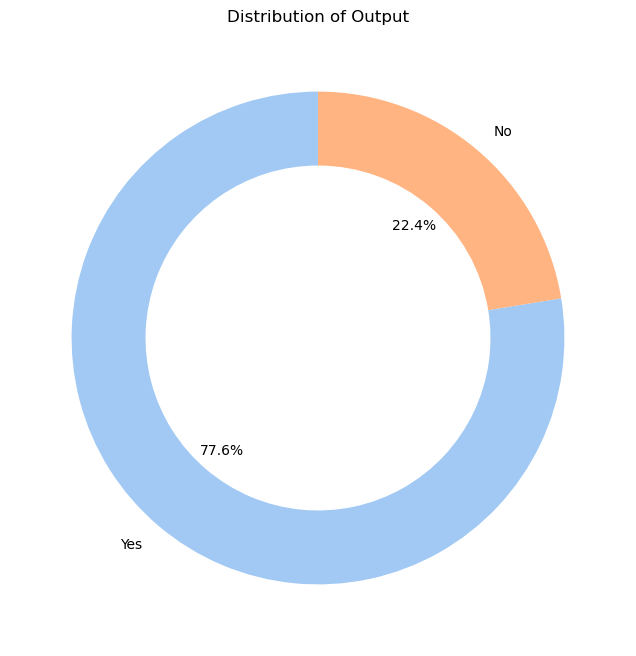

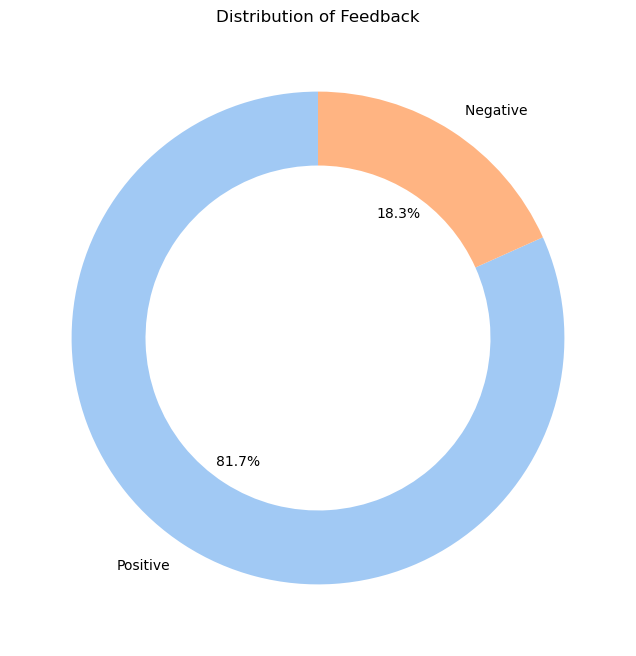

In [16]:
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()
    
    
def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    df[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

for col in df.columns:
    if df[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

# Conclusion

It seems majority of the customers are younger in the early-mid twenties. There are slightly more male users than female users and most of them are single and students with no income. However, the food app is outputing almost 80% of the time and more than 80% of the feedback is positive. There seems to be no correlation between customer attributes and online food app feedback and output. Despite many of the customers are young with no income, the online food app is still outputing and receiving positive reviews.